# Final Project
This project consist of three parts
1. Collecting and cleaning history polling data
2. Make predictions based on the polling data
3. Understand the problems of historical polling

# Cleaning the data
1. Make Data consistent
2. Make pollster names consistent
3. Remove all percentage (%) but mark it by the column name

In [171]:
import csv
import pandas as pd
file = open("data/polling_data_cleaned.csv")

In [172]:
df = pd.read_csv(file)

In [161]:
pollsters = list(pd.unique(df.POLLSTER))
pollsters = list(filter(lambda x: x.__class__.__name__ == "str", pollsters ))

In [162]:
# These are the sorted pollster names
sorted(pollsters)

['TVBS',
 '世新大學',
 '中國時報',
 '中央警察大學',
 '中央通訊社',
 '中山大學',
 '中華學術基金會',
 '中華民國婦女創業協會',
 '企業發展研究學會',
 '傳訊電視',
 '全國意向',
 '公信力民',
 '典通',
 '勁報',
 '北市教大',
 '台灣指標',
 '台灣蓋洛普',
 '國民黨',
 '壹電視',
 '大趨勢',
 '天下雜誌',
 '宋楚瑜競選總部',
 '展欣科技',
 '山水',
 '年代',
 '旺旺中時',
 '明裕文化基金會',
 '民意測驗學會',
 '民進黨',
 '民間決策國際公關民調中心',
 '決策',
 '砝迪斯',
 '精湛',
 '聯合報',
 '自由時報',
 '蘋果日報',
 '親民黨',
 '觀察家',
 '趨勢',
 '遠見']

In [163]:
# fix name
df.replace("聯合報系", "聯合報", inplace=True)
df.replace("年代民調中心", "年代", inplace=True)
df.replace("年代民調", "年代", inplace=True)
df.replace("山水民調", "山水", inplace=True)
df.replace("中國國民黨", "國民黨", inplace=True)
df.replace("決策／精湛", "決策", inplace=True)
df.replace("國家競争力研究學會/大趨勢民調", "大趨勢", inplace=True)
df.replace("陳呂競選", "民進黨", inplace=True)
df.replace("陳水扁台", "民進黨", inplace=True)
df.replace("環球電視/新新聞/中央通訊社", "中央通訊社", inplace=True)

# fix data
df.replace("—", "0", inplace=True)

In [164]:
df

,Unnamed: 0,POLLSTER,DATE,SAMPLE,ERROR(%),DPP(%),KMT(%),THIRD_PARTY(%),NO_OPINION(%),SCALE,YEAR,ORIGINAL_FILE,NOTES
0,0,決策,8/24/2015,1075.0,2.99,41.20,25.50,15.00,18.30,national,14th,https://twcspa.files.wordpress.com/2015/08/e68...,以中華電信住宅電話用戶為抽樣母體
1,1,國民黨,9/14/2015,NaN,NaN,43.00,33.00,13.00,11,national,14th,https://www.youtube.com/watch?v=BlPCuYZsNdQ,NaN
2,2,蘋果日報,10/6/2015,584.0,NaN,40.92,29.28,15.07,14.73,national,14th,http://www.appledaily.com.tw/appledaily/articl...,NaN
3,3,TVBS,10/7/2015,1083.0,3.00,48.00,29.00,10.00,13,national,14th,http://www.tvbs.com.tw/export/sites/tvbs/file/...,http://news.tvbs.com.tw/politics/620560
4,4,決策,10/7/2015,1074.0,2.99,42.10,19.00,14.10,24.80,national,14th,http://www.appledaily.com.tw/realtimenews/arti...,NaN
5,5,台灣指標,10/13/2015,1003.0,3.10,44.60,21.00,12.00,22.40,national,14th,http://www.tisr.com.tw/?p=5983#more-5983,NaN
6,6,蘋果日報,10/16/2015,1350.0,NaN,45.47,26.23,12.63,15.67,national,14th,http://www.appledaily.com.tw/appledaily/articl...,電話輔助
7,7,砝迪斯,10/16/2015,24200.0,NaN,40.18,17.17,22.39,17.72,national,14th,https://www.youtube.com/watch?v=UDW5dKKzwfs,NaN
8,8,自由時報,10/17/2015,1031.0,3.05,47.04,18.91,7.86,26.19,national,14th,http://news.ltn.com.tw/news/focus/paper/924678,NaN
9,9,決策,10/17/2015,1077.0,2.99,45.20,21.90,13.80,19.10,national,14th,https://www.facebook.com/cspa.tw/posts/4373046...,NaN


In [68]:
# aggregate and check each pollsters amount.
df.groupby("POLLSTER").agg(len)[["DATE"]]

,DATE
POLLSTER,
TVBS,91
世新大學,14
中國時報,92
中央警察大學,1
中央通訊社,1
中山大學,3
中華學術基金會,1
中華民國婦女創業協會,1
企業發展研究學會,1


In [93]:
def switchYear(y):
    if (not y.find("年") >= 0):
        return y
    s = y.split("年")
    return s[1] + s[0]
    
date = list(df.DATE)
date = list(map(lambda x: x.replace("月", "/").replace("日", "/"), date))
date = list(map(switchYear, date))

In [94]:
df.DATE = pd.Series()

['8/24/2015',
 '9/14/2015',
 '10/6/2015',
 '10/7/2015',
 '10/7/2015',
 '10/13/2015',
 '10/16/2015',
 '10/16/2015',
 '10/17/2015',
 '10/17/2015',
 '10/17/2015',
 '10/19/2015',
 '10/22/2015',
 '10/24/2015',
 '10/27/2015',
 '10/31/2015',
 '11/3/2015',
 '11/5/2015',
 '11/7/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/8/2015',
 '11/10/2015',
 '11/14/2015',
 '11/14/2015',
 '11/19/2015',
 '11/21/2015',
 '11/25/2015',
 '11/25/2015',
 '11/26/2015',
 '11/27/2015',
 '11/27/2015',
 '12/2/2015',
 '12/5/2015',
 '12/7/2015',
 '12/8/2015',
 '12/9/2015',
 '12/11/2015',
 '12/12/2015',
 '12/13/2015',
 '12/13/2015',
 '12/13/2015',
 '12/16/2015',
 '12/16/2015',
 '12/20/2015',
 '12/20/2015',
 '12/23/2015',
 '12/26/2015',
 '12/26/2015',
 '12/26/2015',
 '12/27/2015',
 '12/27/2015',
 '12/28/2015',
 '12/28/2015',
 '12/28/2015',
 '12/28/2015',
 '12/28/2015',
 '12/29/2015',
 '12/30/2015',
 '1/2/2016',
 '1/2/2016',
 '1/2/2016',
 '1/3/20

In [96]:
df.DATE = pd.Series(date)

In [109]:
df.DPP = df.DPP.apply(lambda x: x.replace("%", ""))
df.KMT = df.KMT.apply(lambda x: x.replace("%", ""))
df.THIRD_PARTY = df.THIRD_PARTY.apply(lambda x: x.replace("%", ""))
df.NO_OPINION = df.NO_OPINION.apply(lambda x: x.replace("%", ""))

In [110]:
newCol = list(df.columns)
newCol[4] = "DPP(%)"
newCol[5] = "KMT(%)"
newCol[6] = "THIRD_PARTY(%)"
newCol[7] = "NO_OPINION(%)"
df.columns = newCol

In [112]:
df.to_csv("data/polling_data_cleaned.csv")

# Rank each pollster
We rank each pollsters based on the average polling error they have on each elections.

In [340]:
df = pd.read_csv("data/polling_data_cleaned.csv")
# del df["Unnamed: 0"]
df = df[df.BANNED != 1]
df = df[df.SCALE == "national"]
df.head(15)

,POLLSTER,DATE,SAMPLE,ERROR(%),DPP(%),KMT(%),THIRD_PARTY(%),NO_OPINION(%),SCALE,YEAR,ORIGINAL_FILE,NOTES,BANNED
0,決策,8/24/2015,1075.0,2.99,41.20,25.50,15.00,18.30,national,14th,https://twcspa.files.wordpress.com/2015/08/e68...,以中華電信住宅電話用戶為抽樣母體,NaN
1,國民黨,9/14/2015,NaN,NaN,43.00,33.00,13.00,11.00,national,14th,https://www.youtube.com/watch?v=BlPCuYZsNdQ,NaN,NaN
2,蘋果日報,10/6/2015,584.0,NaN,40.92,29.28,15.07,14.73,national,14th,http://www.appledaily.com.tw/appledaily/articl...,NaN,NaN
3,TVBS,10/7/2015,1083.0,3.00,48.00,29.00,10.00,13.00,national,14th,http://www.tvbs.com.tw/export/sites/tvbs/file/...,http://news.tvbs.com.tw/politics/620560,NaN
4,決策,10/7/2015,1074.0,2.99,42.10,19.00,14.10,24.80,national,14th,http://www.appledaily.com.tw/realtimenews/arti...,NaN,NaN
5,台灣指標,10/13/2015,1003.0,3.10,44.60,21.00,12.00,22.40,national,14th,http://www.tisr.com.tw/?p=5983#more-5983,NaN,NaN
6,蘋果日報,10/16/2015,1350.0,NaN,45.47,26.23,12.63,15.67,national,14th,http://www.appledaily.com.tw/appledaily/articl...,電話輔助,NaN
8,自由時報,10/17/2015,1031.0,3.05,47.04,18.91,7.86,26.19,national,14th,http://news.ltn.com.tw/news/focus/paper/924678,NaN,NaN
9,決策,10/17/2015,1077.0,2.99,45.20,21.90,13.80,19.10,national,14th,https://www.facebook.com/cspa.tw/posts/4373046...,NaN,NaN
10,趨勢,10/17/2015,1084.0,3.00,41.60,20.70,10.10,27.60,national,14th,http://www.setn.com/News.aspx?NewsID=101079,NaN,NaN


In [341]:
df["NO_OPINION(%)"] = pd.to_numeric(df["NO_OPINION(%)"])
df["KMT(%)"] = pd.to_numeric(df["KMT(%)"])
df["DPP(%)"] = pd.to_numeric(df["DPP(%)"])

In [342]:
resultFile = open("data/election_results.csv")
results = csv.DictReader(resultFile)

In [343]:
def topTwoDiff(x,y,z):
    t = sorted([x,y,z], reverse=True)
    return float("{0:.2f}".format(t[0]-t[1]))

# A reference that we can check the correct result for each election and calculate the error
resultLookup = dict()
for result in results:
    result["KMT"] = float(result["KMT(%)"])
    result["DPP"] = float(result["DPP(%)"])
    result["OTHERS"] = float(result["OTHERS(%)"])
    result["DIFF"] = topTwoDiff(result["KMT"], result["DPP"], result["OTHERS"])
    resultLookup[result["ELECTION"]] = result

In [395]:
resultLookup["9th"]["incumbent"] = None
resultLookup["10th"]["incumbent"] = "KMT"
resultLookup["11th"]["incumbent"] = "DPP"
resultLookup["12th"]["incumbent"] = "DPP"
resultLookup["13th"]["incumbent"] = "KMT"
resultLookup["14th"]["incumbent"] = "KMT"

In [345]:
# Get the error for each poll

'''
This function finds the margin of top two polled parties and calculate the distance 
between this result and the election result.
'''

def findMostDist(poll):

    # print("DPP: " + str(poll[4]) )
    # print("KMT: " + str(poll[5]) )
    # print("OTHERS: " + str(poll[6]))
    # print("NO OPI: " + str(poll[7]))
    polls = sorted( map( lambda x: float(x),poll[4:8]) ,reverse=True)
    delta = polls[0] - polls[1]
    election = poll[9]
    err = delta - resultLookup[election]["DIFF"]
    return err
    
    
df["ERROR"] = df.apply(findMostDist, 1)
df["ABS_ERROR"] = df["ERROR"].apply(lambda x: abs(x)) 
df.head()

,POLLSTER,DATE,SAMPLE,ERROR(%),DPP(%),KMT(%),THIRD_PARTY(%),NO_OPINION(%),SCALE,YEAR,ORIGINAL_FILE,NOTES,BANNED,ERROR,ABS_ERROR
0,決策,8/24/2015,1075.0,2.99,41.20,25.50,15.00,18.30,national,14th,https://twcspa.files.wordpress.com/2015/08/e68...,以中華電信住宅電話用戶為抽樣母體,NaN,-9.38,9.38
1,國民黨,9/14/2015,NaN,NaN,43.00,33.00,13.00,11.00,national,14th,https://www.youtube.com/watch?v=BlPCuYZsNdQ,NaN,NaN,-15.08,15.08
2,蘋果日報,10/6/2015,584.0,NaN,40.92,29.28,15.07,14.73,national,14th,http://www.appledaily.com.tw/appledaily/articl...,NaN,NaN,-13.44,13.44
3,TVBS,10/7/2015,1083.0,3.00,48.00,29.00,10.00,13.00,national,14th,http://www.tvbs.com.tw/export/sites/tvbs/file/...,http://news.tvbs.com.tw/politics/620560,NaN,-6.08,6.08
4,決策,10/7/2015,1074.0,2.99,42.10,19.00,14.10,24.80,national,14th,http://www.appledaily.com.tw/realtimenews/arti...,NaN,NaN,-7.78,7.78


In [346]:
# Aggregate the error
# this error indicates how well the pollster show the difference between the leading and the second candidate.

# df.groupby("POLLSTER").agg(["mean", len"])[["ABS_ERROR"]].sort_values(by="ABS_ERROR", ascending=False)
pollster_df = df.groupby("POLLSTER").agg(["mean", len])["ABS_ERROR"].sort_values(by="len", ascending=False)

In [374]:
pollster_df.to_csv("data/pollster.csv")

In [347]:
from math import sqrt
pollsterLookup = {}
for p in pollster_df.iterrows():
    pollsterLookup[p[0]] = {
        'mean-error': p[1]["mean"],
        'count': p[1]['len'],
        'contribute-weight': sqrt(p[1]['len']/p[1]['mean'])
    }

In [348]:
pollsterLookup

{'TVBS': {'contribute-weight': 3.699633457561196,
  'count': 90.0,
  'mean-error': 6.5754444444444342},
 '世新大學': {'contribute-weight': 1.3526096553251774,
  'count': 14.0,
  'mean-error': 7.6521428571428549},
 '中國時報': {'contribute-weight': 6.825496789896391,
  'count': 92.0,
  'mean-error': 1.9747826086956526},
 '中央警察大學': {'contribute-weight': 0.5976143046671968,
  'count': 1.0,
  'mean-error': 2.7999999999999998},
 '中央通訊社': {'contribute-weight': 0.40488816508945796,
  'count': 1.0,
  'mean-error': 6.1000000000000005},
 '中山大學': {'contribute-weight': 0.48538860126793026,
  'count': 3.0,
  'mean-error': 12.733333333333329},
 '中華學術基金會': {'contribute-weight': 0.76696498884737,
  'count': 1.0,
  'mean-error': 1.7000000000000022},
 '中華民國婦女創業協會': {'contribute-weight': 0.2961744388795462,
  'count': 1.0,
  'mean-error': 11.399999999999999},
 '企業發展研究學會': {'contribute-weight': 0.46126560401444244,
  'count': 1.0,
  'mean-error': 4.700000000000002},
 '傳訊電視': {'contribute-weight': 0.99999999999999

In [349]:
from datetime import datetime

# calculate a weight for each pollster data using 2016 data

def weight(p):
    polling_date = datetime.strptime(p["DATE"], '%m/%d/%Y') 
    election_date = datetime.strptime(resultLookup[p["YEAR"]]["DATE"], '%m/%d/%Y') 
    delta = election_date - polling_date
    weight = pollsterLookup[p["POLLSTER"]]["contribute-weight"]/delta.days
    return weight

df["weight"] = df.apply(weight, axis=1)



,SAMPLE,ERROR(%),DPP(%),KMT(%),THIRD_PARTY(%),NO_OPINION(%),BANNED,ERROR,ABS_ERROR,weight
YEAR,,,,,,,,,,
10th,NaN,NaN,522.50,495.00,530.10,652.40,NaN,103.80,109.60,2.137770
11th,112939.0,1.70,3507.29,4164.30,0.00,2428.31,NaN,646.99,647.47,16.744497
12th,2185.0,5.90,1938.40,3416.00,0.00,1645.60,NaN,190.40,338.20,30.061321
13th,10843.0,21.83,6002.59,6831.38,1773.56,2678.55,NaN,-182.92,397.94,17.560294
14th,64167.0,112.77,3239.15,1579.32,810.52,1770.71,NaN,-594.22,634.42,6.559623


In [352]:
weightSumLookup = df.groupby("YEAR").agg(sum)["weight"]
#weight_sum = sum(df["weight"])

def newWeight(p):
    return p["weight"]/weightSumLookup[p["YEAR"]]

# calculate the new weight for every poll
# df["norm-weight"] = df['weight']/sum(df["weight"])
df["norm-weight"] = df.apply(newWeight, axis=1)

In [353]:
df.head()

,POLLSTER,DATE,SAMPLE,ERROR(%),DPP(%),KMT(%),THIRD_PARTY(%),NO_OPINION(%),SCALE,YEAR,ORIGINAL_FILE,NOTES,BANNED,ERROR,ABS_ERROR,weight,norm-weight
0,決策,8/24/2015,1075.0,2.99,41.20,25.50,15.00,18.30,national,14th,https://twcspa.files.wordpress.com/2015/08/e68...,以中華電信住宅電話用戶為抽樣母體,NaN,-9.38,9.38,0.011008,0.001678
1,國民黨,9/14/2015,NaN,NaN,43.00,33.00,13.00,11.00,national,14th,https://www.youtube.com/watch?v=BlPCuYZsNdQ,NaN,NaN,-15.08,15.08,0.007889,0.001203
2,蘋果日報,10/6/2015,584.0,NaN,40.92,29.28,15.07,14.73,national,14th,http://www.appledaily.com.tw/appledaily/articl...,NaN,NaN,-13.44,13.44,0.009041,0.001378
3,TVBS,10/7/2015,1083.0,3.00,48.00,29.00,10.00,13.00,national,14th,http://www.tvbs.com.tw/export/sites/tvbs/file/...,http://news.tvbs.com.tw/politics/620560,NaN,-6.08,6.08,0.036630,0.005584
4,決策,10/7/2015,1074.0,2.99,42.10,19.00,14.10,24.80,national,14th,http://www.appledaily.com.tw/realtimenews/arti...,NaN,NaN,-7.78,7.78,0.015804,0.002409


# Prediction
0. Split the NO_OPINION data into other three part based on current distribution
1. Make Predictions based on the weights
2. 

In [354]:
def splitNoOpinionToKMT(p):
    no_opinion = p["NO_OPINION(%)"]
    split_kmt = p["KMT(%)"] * ( 1 + no_opinion/(100 - no_opinion) )
    return split_kmt * p["norm-weight"]
def splitNoOpinionToDPP(p):
    no_opinion = p["NO_OPINION(%)"]
    split_dpp = p["DPP(%)"] * ( 1 + no_opinion/(100 - no_opinion) )
    return split_dpp * p["norm-weight"]
def splitNoOpinionToTRD(p):
    no_opinion = p["NO_OPINION(%)"]
    split_trd = p["THIRD_PARTY(%)"] * ( 1 + no_opinion/(100-no_opinion) )
    return split_trd * p["norm-weight"]
    
df["predict_kmt"] = df.apply( splitNoOpinionToKMT, axis=1 ) 
df["predict_dpp"] = df.apply( splitNoOpinionToDPP, axis=1 )
df["predict_trd"] = df.apply( splitNoOpinionToTRD, axis=1 )

In [361]:
prediction_results = df.groupby("YEAR").agg('sum')[["predict_kmt", "predict_dpp", "predict_trd"]]
prediction_results.head()

,predict_kmt,predict_dpp,predict_trd
YEAR,,,
10th,32.361288,33.209391,34.429321
11th,53.329811,46.672134,0.000000
12th,62.344981,37.655019,0.000000
13th,47.687750,41.982196,10.293131
14th,27.581861,56.124275,16.650080


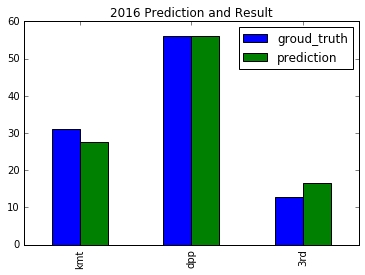

In [338]:
%matplotlib inline
import matplotlib.pyplot as plt
result_2016 = pd.DataFrame( {"prediction":[predict_kmt, predict_dpp, predict_trd],
                             "groud_truth": [31.04, 56.12, 12.84]} , index=["kmt", "dpp", "3rd"])
result_2016.plot.bar(title="2016 Prediction and Result")

In [382]:
# print(prediction_results["predict_kmt"]['14th'])
# print(prediction_results["predict_dpp"]['14th'])
# print(prediction_results["predict_kmt"]['14th'] - prediction_results["predict_dpp"]['14th'])

print('Error DPP: {}'.format(prediction_results["predict_dpp"]["14th"] - resultLookup["14th"]["DPP"]) )
print('Error KMT: {}'.format(prediction_results["predict_kmt"]["14th"] - resultLookup["14th"]["KMT"]) )
print('Error TRD: {}'.format(prediction_results["predict_trd"]["14th"] - resultLookup["14th"]["OTHERS"]) )

Error DPP: 0.0042750204850108275
Error KMT: -3.4581391454565775
Error TRD: 3.810080392182659


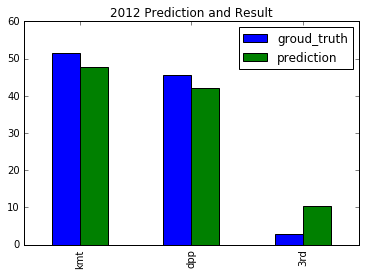

In [368]:
result_2012 = pd.DataFrame( {"prediction":[prediction_results["predict_kmt"]['13th'], 
                                           prediction_results["predict_dpp"]["13th"], 
                                           prediction_results["predict_trd"]["13th"]],
                             "groud_truth": [resultLookup["13th"]['KMT'], 
                                             resultLookup["13th"]['DPP'], 
                                             resultLookup["13th"]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2012.plot.bar(title="2012 Prediction and Result")

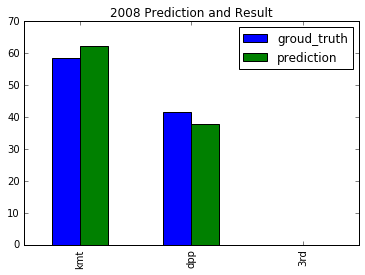

In [371]:
result_2008 = pd.DataFrame( {"prediction":[prediction_results["predict_kmt"]['12th'], 
                                           prediction_results["predict_dpp"]["12th"], 
                                           prediction_results["predict_trd"]["12th"]],
                             "groud_truth": [resultLookup["12th"]['KMT'], 
                                             resultLookup["12th"]['DPP'], 
                                             resultLookup["12th"]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2008.plot.bar(title="2008 Prediction and Result")

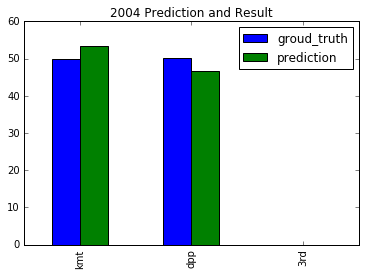

In [372]:
result_2004 = pd.DataFrame( {"prediction":[prediction_results["predict_kmt"]['11th'], 
                                           prediction_results["predict_dpp"]["11th"], 
                                           prediction_results["predict_trd"]["11th"]],
                             "groud_truth": [resultLookup["11th"]['KMT'], 
                                             resultLookup["11th"]['DPP'], 
                                             resultLookup["11th"]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2004.plot.bar(title="2004 Prediction and Result")

In [377]:
print(prediction_results["predict_kmt"]['11th'])
print(prediction_results["predict_dpp"]['11th'])
print(prediction_results["predict_kmt"]['11th'] - prediction_results["predict_dpp"]['11th'])

53.3298105547
46.6721337056
6.65767684904


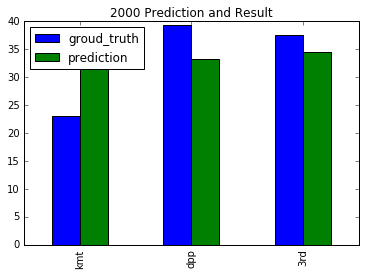

In [373]:
result_2000 = pd.DataFrame( {"prediction":[prediction_results["predict_kmt"]['10th'], 
                                           prediction_results["predict_dpp"]["10th"], 
                                           prediction_results["predict_trd"]["10th"]],
                             "groud_truth": [resultLookup["10th"]['KMT'], 
                                             resultLookup["10th"]['DPP'], 
                                             resultLookup["10th"]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2000.plot.bar(title="2000 Prediction and Result")

In [ ]:
result_1996 = pd.DataFrame( {"prediction":[prediction_results["predict_kmt"]['10th'], 
                                           prediction_results["predict_dpp"]["10th"], 
                                           prediction_results["predict_trd"]["10th"]],
                             "groud_truth": [resultLookup["10th"]['KMT'], 
                                             resultLookup["10th"]['DPP'], 
                                             resultLookup["10th"]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2000.plot.bar(title="2000 Prediction and Result")

# Include the economic Index

In [454]:
econ_df = pd.read_csv("data/econ_refined.csv")
econ_df.head(6)

,ELECTION,GDP,UNEMPLOYMENT_RATE(DELTA%)(NEGATED),DISPOSABLE_INCOME,INFLATION(CPI)(NEGATED),STOCK(DELTA%),CA_MODEL
0,9th,1.633091,-0.899746,-1.406843,1.289984,-1.140000,-0.648800
1,10th,0.000620,-0.899746,-0.667821,0.628386,1.130000,0.079841
2,11th,-0.728229,0.154242,-0.273148,0.538047,1.150000,-0.126012
3,12th,0.532382,-0.308484,0.329860,-0.228504,0.250000,0.336136
4,13th,-1.211648,1.799492,0.587476,-0.871503,-0.900234,0.031957
5,14th,-0.226216,0.154242,1.430476,-1.356410,-0.487086,0.326878


In [455]:
econLookup = {}
for _e in econ_df.iterrows():
    # print(e)
    e = _e[1]
    econLookup[e["ELECTION"]] = e["CA_MODEL"]
econLookup

{'10th': 0.079841219,
 '11th': -0.126011553,
 '12th': 0.336136155,
 '13th': 0.031956759,
 '14th': 0.326877749,
 '9th': -0.648800328}

In [456]:
# get a new copy of prediction and update it with economy indices
econ_pred = prediction_results.copy()

# update the incumbent party based on CA_MODEL value in the econLookup dictionary
for i, _e in enumerate(econ_pred.iterrows()):
    y = _e[0]
    e = _e[1]
    # print(i)
    econ_delta = econLookup[y] * 7.5
    if resultLookup[y]["incumbent"] == "DPP": 
        econ_pred.iloc[i, 1] = econ_pred.iloc[i, 1] + econ_delta
    elif resultLookup[y]["incumbent"] == "KMT":
        econ_pred.iloc[i, 0] = econ_pred.iloc[i, 0] + econ_delta

In [457]:
# calculate the new sum and rescale all prediction values proportionally
def sumAllParty(pred):
    print(pred)
    return pred["predict_kmt"] + pred["predict_dpp"] + pred["predict_trd"]

econ_pred["new_sum"] = econ_pred.apply(sumAllParty, axis=1)
econ_pred["predict_kmt"] = econ_pred["predict_kmt"]/econ_pred["new_sum"] * 100
econ_pred["predict_dpp"] = econ_pred["predict_dpp"]/econ_pred["new_sum"] * 100
econ_pred["predict_trd"] = econ_pred["predict_trd"]/econ_pred["new_sum"] * 100
econ_pred = econ_pred[["predict_kmt", "predict_dpp", "predict_trd"]]

predict_kmt    32.960097
predict_dpp    33.209391
predict_trd    34.429321
Name: 10th, dtype: float64
predict_kmt    53.329811
predict_dpp    45.727047
predict_trd     0.000000
Name: 11th, dtype: float64
predict_kmt    62.344981
predict_dpp    40.176040
predict_trd     0.000000
Name: 12th, dtype: float64
predict_kmt    47.927426
predict_dpp    41.982196
predict_trd    10.293131
Name: 13th, dtype: float64
predict_kmt    30.033444
predict_dpp    56.124275
predict_trd    16.650080
Name: 14th, dtype: float64


In [458]:
econ_pred["predict_kmt"]["14th"]

29.213196033558713

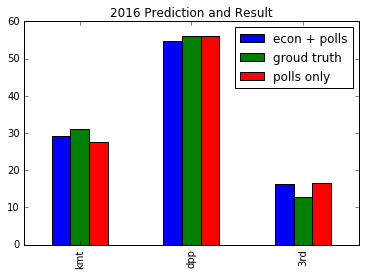

In [459]:
result_2016 = pd.DataFrame( {"polls only":[prediction_results["predict_kmt"]['14th'], 
                                           prediction_results["predict_dpp"]["14th"], 
                                           prediction_results["predict_trd"]["14th"]],
                             "econ + polls": [econ_pred["predict_kmt"]["14th"],
                                              econ_pred["predict_dpp"]["14th"],
                                              econ_pred["predict_trd"]["14th"]],
                             "groud truth": [resultLookup["14th"]['KMT'], 
                                             resultLookup["14th"]['DPP'], 
                                             resultLookup["14th"]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2016.plot.bar(title="2016 Prediction and Result")

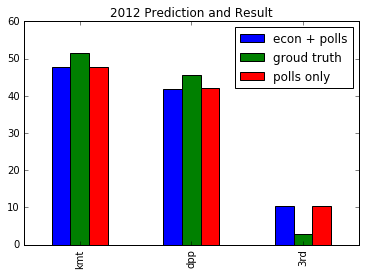

In [460]:
year = "13th"
result_2012 = pd.DataFrame( {"polls only":[prediction_results["predict_kmt"][year], 
                                           prediction_results["predict_dpp"][year], 
                                           prediction_results["predict_trd"][year]],
                             "econ + polls": [econ_pred["predict_kmt"][year],
                                              econ_pred["predict_dpp"][year],
                                              econ_pred["predict_trd"][year]],
                             "groud truth": [resultLookup[year]['KMT'], 
                                             resultLookup[year]['DPP'], 
                                             resultLookup[year]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2012.plot.bar(title="2012 Prediction and Result")

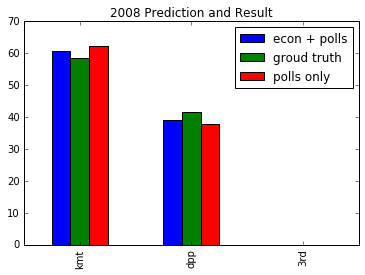

In [461]:
year = "12th"
result_2008 = pd.DataFrame( {"polls only":[prediction_results["predict_kmt"][year], 
                                           prediction_results["predict_dpp"][year], 
                                           prediction_results["predict_trd"][year]],
                             "econ + polls": [econ_pred["predict_kmt"][year],
                                              econ_pred["predict_dpp"][year],
                                              econ_pred["predict_trd"][year]],
                             "groud truth": [resultLookup[year]['KMT'], 
                                             resultLookup[year]['DPP'], 
                                             resultLookup[year]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2008.plot.bar(title="2008 Prediction and Result")

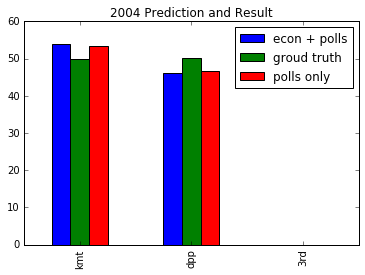

In [462]:
year = "11th"
result_2004 = pd.DataFrame( {"polls only":[prediction_results["predict_kmt"][year], 
                                           prediction_results["predict_dpp"][year], 
                                           prediction_results["predict_trd"][year]],
                             "econ + polls": [econ_pred["predict_kmt"][year],
                                              econ_pred["predict_dpp"][year],
                                              econ_pred["predict_trd"][year]],
                             "groud truth": [resultLookup[year]['KMT'], 
                                             resultLookup[year]['DPP'], 
                                             resultLookup[year]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2004.plot.bar(title="2004 Prediction and Result")

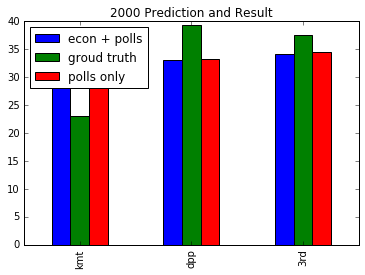

In [463]:
year = "10th"
result_2000 = pd.DataFrame( {"polls only":[prediction_results["predict_kmt"][year], 
                                           prediction_results["predict_dpp"][year], 
                                           prediction_results["predict_trd"][year]],
                             "econ + polls": [econ_pred["predict_kmt"][year],
                                              econ_pred["predict_dpp"][year],
                                              econ_pred["predict_trd"][year]],
                             "groud truth": [resultLookup[year]['KMT'], 
                                             resultLookup[year]['DPP'], 
                                             resultLookup[year]['OTHERS']]} , index=["kmt", "dpp", "3rd"])
result_2000.plot.bar(title="2000 Prediction and Result")

In [453]:
econLookup

{'10th': 0.079841219,
 '11th': -0.126011553,
 '12th': 0.336136155,
 '13th': 0.031956759,
 '14th': 0.326877749,
 '9th': -0.648800328}

In [412]:
econ_pred.iloc[ 0, 2]

34.42932068885726

In [413]:
econLookup

{'10th': 0.079841219,
 '11th': -0.126011553,
 '12th': 0.336136155,
 '13th': 0.031956759,
 '14th': 0.326877749,
 '9th': -0.648800328}

In [248]:
# Get the party error for each pollster
# Here I am assuming that no_opinion voters are of the same distribution of the expressive people.
# Stuck here... I am not sure how to measure the bias of each pollster XDDD

def getPartyError(poll):
    election = poll["YEAR"]
    # the base of splitting the NO_OPINION polls
    bn = poll["NO_OPINION(%)"] / (100 - poll["NO_OPINION(%)"])
    
    dpp_error = ( poll["DPP(%)"] * (1 + bn) ) - resultLookup[election]["DPP"]
    kmt_error = ( poll["KMT(%)"] * (1 + bn) ) - resultLookup[election]["KMT"]
    
    print(poll["POLLSTER"])
    # print(bn)
    # print(dpp_error)
    # print(kmt_error)
    print( "DPP Error: {:.2f}, KMT Error: {:.2f}".format(dpp_error, kmt_error) )
    # print("")
    

df.apply(getPartyError, axis=1)

決策
DPP Error: -5.69, KMT Error: 0.17
國民黨
DPP Error: -7.81, KMT Error: 6.04
蘋果日報
DPP Error: -8.13, KMT Error: 3.30
TVBS
DPP Error: -0.95, KMT Error: 2.29
決策
DPP Error: -0.14, KMT Error: -5.77
台灣指標
DPP Error: 1.35, KMT Error: -3.98
蘋果日報
DPP Error: -2.20, KMT Error: 0.06
砝迪斯
DPP Error: -7.29, KMT Error: -10.17
自由時報
DPP Error: 7.61, KMT Error: -5.42
決策
DPP Error: -0.25, KMT Error: -3.97
趨勢
DPP Error: 1.34, KMT Error: -2.45
TVBS
DPP Error: -2.00, KMT Error: 3.08
旺旺中時
DPP Error: -0.15, KMT Error: 0.33
趨勢
DPP Error: 8.18, KMT Error: -9.25
台灣指標
DPP Error: 7.79, KMT Error: -8.79
世新大學
DPP Error: 3.94, KMT Error: -3.32
世新大學
DPP Error: 2.83, KMT Error: -2.39
決策
DPP Error: 1.46, KMT Error: -4.19
趨勢
DPP Error: 4.45, KMT Error: -6.40
趨勢
DPP Error: 2.58, KMT Error: -1.82
趨勢
DPP Error: 1.81, KMT Error: -1.20
趨勢
DPP Error: 2.28, KMT Error: -3.74
國民黨
DPP Error: 1.77, KMT Error: -2.09
旺旺中時
DPP Error: -3.21, KMT Error: 3.10
世新大學
DPP Error: 2.31, KMT Error: -1.07
決策
DPP Error: 5.95, KMT Error: -3.71
TVBS
DP

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
428    None
429    None
430    None
431    None
432    None
433    None
434    None
435    None
436    None
437    None
438    None
439    None
440    None
441    None
442    None
443    None
444    None
445    None
446    None
447    None
448    None
449    None
450    None
451    None
452    None
453    None
454    None
455    None
456    None
457    None
dtype: object

In [ ]:
# Decide the parameter to give each pollster
